In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df = pd.read_csv(r"D:\Data Science\data world ds\task 4\Data\credit_card_transactions_cleaned.csv")

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [14]:
# Aggregate transaction amount by day
daily_spending = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum().reset_index()
daily_spending.columns = ['ds', 'y']  # Rename for Prophet

In [15]:
# Train-Test Split (80% training, 20% testing)
train_size = int(len(daily_spending) * 0.8)
train, test = daily_spending[:train_size], daily_spending[train_size:]

In [16]:
# Initialize Prophet Model
model = Prophet()
model.fit(train)

20:37:13 - cmdstanpy - INFO - Chain [1] start processing
20:37:13 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Create Future DataFrame (next 6 months)
future = model.make_future_dataframe(periods=180)

In [18]:
# Make Predictions
forecast = model.predict(future)

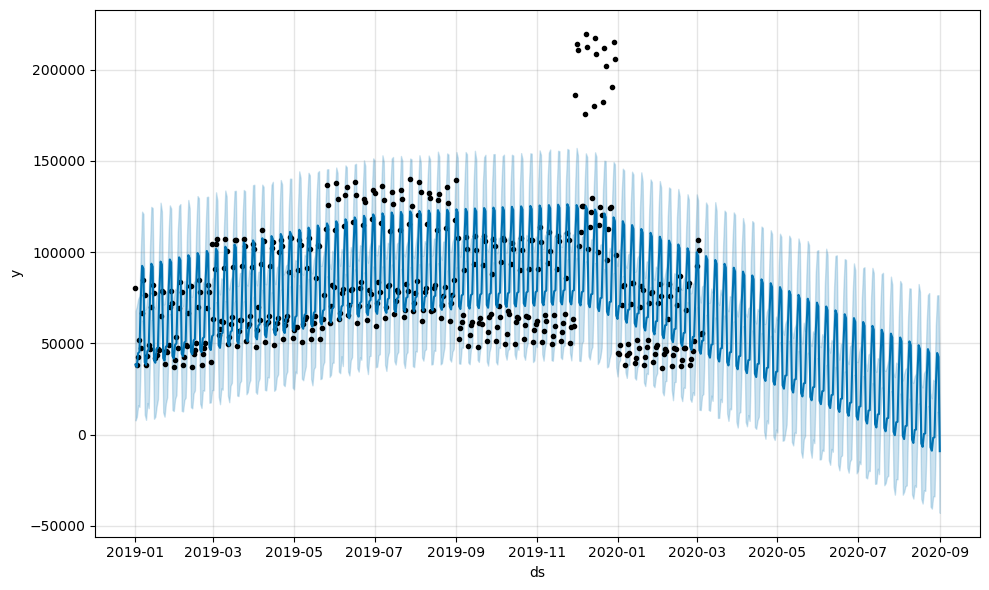

In [19]:
# Plot Forecast
fig = model.plot(forecast)
plt.show()


In [22]:
# Calculate Evaluation Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Print Metrics
print(f"📊 Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"🔹 R² Score: {r2:.4f}")



📊 Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 33485.13
🔹 Mean Squared Error (MSE): 1849303333.11
🔹 Root Mean Squared Error (RMSE): 43003.53
🔹 Mean Absolute Percentage Error (MAPE): 38.79%
🔹 R² Score: -1.8208
